In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

In [2]:
def rename_cols(dataframe): 
    dataframe.rename(columns = {"Read Date":"date","index":"day"},inplace = True)

In [3]:
def add_occupancy(dataframe): 
    dataframe.loc[:,'occupied'] = 0
    dataframe.loc[4:77,'occupied'] = 1
    dataframe.loc[234:329,'occupied'] = 1
    dataframe.loc[374:402,'occupied'] = 1/2
    dataframe.loc[402:,'occupied'] = 1
    return dataframe 

In [4]:
def add_capacity_and_sqft(dataframe, capacity, sq_ft): 
    dataframe.loc[:,'kw_per_person'] = dataframe.kW/capacity 
    dataframe.loc[:,'kw_per_sq_ft'] = dataframe.kW/sq_ft
    dataframe.loc[:,'week'] = [i//7 for i in range(len(dataframe))]
    return dataframe

In [5]:
def plot_capacity(dataframe): 
    plt.bar(dataframe.index, dataframe.kw_per_person)
    plt.show()

In [6]:
def plot_sq_ft(dataframe): 
    plt.bar(dataframe.index, dataframe.kw_per_sq_ft)
    plt.show()

In [7]:
def remove_nulls(dataframe): 
    dataframe = dataframe[dataframe.kW.notnull()]
    return dataframe

In [8]:
def merge_temp_building(dataframe,temp): 
    dataframe['Date'] = pd.to_datetime(dataframe['date'])
    dataframe.drop(columns="date", inplace = True)
    new = dataframe.merge(temp, how='left', on = 'Date')
    return new

### Load in Temperature Data

In [9]:
temp = pd.read_csv("temperature.csv")

In [10]:
temp['Date'] = pd.to_datetime(temp['Date time'])

In [11]:
temp.drop(columns={"Date time",'Wind Chill','Heat Index','Precipitation','Snow','Snow Depth','Wind Speed',
          'Wind Direction','Wind Gust', 'Visibility','Cloud Cover','Relative Humidity','Conditions', 'Name'}, inplace = True)

In [12]:
temp.rename(columns={"Maximum Temperature":"max_temp","Minimum Temperature":"min_temp",
                     "Temperature":"average_temp"}, inplace=True)

## By Capacity

In [13]:
pearl = pd.read_csv("pearl_daily.csv")
pearl = remove_nulls(pearl)
add_occupancy(pearl)
pearl.reset_index(inplace = True) 
rename_cols(pearl)
add_capacity_and_sqft(pearl,148,55.900)
pearl.head()

,day,date,kWh,kW,occupied,kw_per_person,kw_per_sq_ft,week
0,0,1/1/2020 12:00:00 AM,"1,439.9760",80.640,0.0,0.544865,1.442576,0
1,1,1/2/2020 12:00:00 AM,"1,325.8080",68.064,0.0,0.459892,1.217603,0
2,2,1/4/2020 12:00:00 AM,"1,340.0880",71.040,0.0,0.480000,1.270841,0
3,3,1/5/2020 12:00:00 AM,"1,432.7040",69.120,0.0,0.467027,1.236494,0
4,4,1/6/2020 12:00:00 AM,"1,570.9921",101.760,1.0,0.687568,1.820394,0


In [14]:
pearl = merge_temp_building(pearl,temp)

In [15]:
pearl['kw_per_person'].mean()

0.7405334514842721

In [16]:
pearl['kw_per_sq_ft'].mean()

1.9606252382767855

In [17]:
pearl.to_csv("pearl.csv")

In [18]:
model = smf.ols(formula = 'kw_per_person ~ week + occupied + min_temp ', data = pearl).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          kw_per_person   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     38.18
Date:                Fri, 07 May 2021   Prob (F-statistic):           3.70e-22
Time:                        16:29:52   Log-Likelihood:                 262.30
No. Observations:                 488   AIC:                            -516.6
Df Residuals:                     484   BIC:                            -499.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5514      0.028     19.681      0.000       0.496       0.606
week           0.0008      0.000      2.295      0.022       0.000       0.001
occupied       0.1466      0.017      8.622      0.000       0.113       0.180
min_temp       0.0013      0.000      2.971      0.003       0.000       0.002
==============================================================================
Omnibus:                        8.348   Durbin-Watson:                   0.523
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                5.835
Skew:                          -0.133   Prob(JB):                       0.0541
Kurtosis:                       2.535   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
breck = pd.read_csv("breck_daily.csv")
breck = remove_nulls(breck)
add_occupancy(breck)
breck.reset_index(drop=True,inplace = True) 
breck.reset_index(inplace=True)
rename_cols(breck)
add_capacity_and_sqft(breck,102,35.764)

,day,date,kWh,kW,occupied,kw_per_person,kw_per_sq_ft,week
0,0,1/1/2020 12:00:00 AM,991.8840,44.640,0.0,0.437647,1.248183,0
1,1,1/2/2020 12:00:00 AM,930.1320,43.680,0.0,0.428235,1.221340,0
2,2,1/3/2020 12:00:00 AM,862.2360,40.320,0.0,0.395294,1.127391,0
3,3,1/4/2020 12:00:00 AM,"1,003.2240",59.520,0.0,0.583529,1.664243,0
4,4,1/5/2020 12:00:00 AM,"1,217.2321",66.240,1.0,0.649412,1.852142,0
...,...,...,...,...,...,...,...,...
484,484,4/29/2021 12:00:00 AM,"1,275.9960",70.080,1.0,0.687059,1.959512,69
485,485,4/30/2021 12:00:00 AM,"1,143.5520",59.520,1.0,0.583529,1.664243,69
486,486,5/1/2021 12:00:00 AM,"1,070.7000",55.200,1.0,0.541176,1.543452,69
487,487,5/2/2021 12:00:00 AM,"1,196.7000",65.760,1.0,0.644706,1.838721,69


In [20]:
breck = merge_temp_building(breck,temp)

In [21]:
breck['kw_per_person'].mean()

0.5895768074100802

In [22]:
breck['kw_per_sq_ft'].mean()

1.6814907268713872

In [23]:
yerkes = pd.read_csv("yerkes_daily.csv")
yerkes = remove_nulls(yerkes)
add_occupancy(yerkes)
yerkes.reset_index(drop=True,inplace = True) 
yerkes.reset_index(inplace=True)
rename_cols(yerkes)
add_capacity_and_sqft(yerkes,96,20.720)

,day,date,kWh,kW,occupied,kw_per_person,kw_per_sq_ft,week
0,0,1/1/2020 12:00:00 AM,792.2000,36.00,0.0,0.375000,1.737452,0
1,1,1/2/2020 12:00:00 AM,782.0600,36.80,0.0,0.383333,1.776062,0
2,2,1/4/2020 12:00:00 AM,776.4600,35.20,0.0,0.366667,1.698842,0
3,3,1/5/2020 12:00:00 AM,816.2400,49.60,0.0,0.516667,2.393822,0
4,4,1/6/2020 12:00:00 AM,927.6400,56.00,1.0,0.583333,2.702703,0
...,...,...,...,...,...,...,...,...
483,483,4/29/2021 12:00:00 AM,"1,220.9800",65.60,1.0,0.683333,3.166023,69
484,484,4/30/2021 12:00:00 AM,"1,185.0800",69.52,1.0,0.724167,3.355212,69
485,485,5/1/2021 12:00:00 AM,"1,115.9800",62.40,1.0,0.650000,3.011583,69
486,486,5/2/2021 12:00:00 AM,"1,155.4200",61.60,1.0,0.641667,2.972973,69


In [24]:
yerkes = merge_temp_building(yerkes,temp)

In [25]:
yerkes['kw_per_person'].mean()

0.5003142076502735

In [26]:
yerkes['kw_per_sq_ft'].mean()

2.3180581049433537

In [27]:
brock = pd.read_csv("brock_daily.csv")
brock = remove_nulls(brock)
add_occupancy(brock)
brock.reset_index(drop=True,inplace = True) 
brock.reset_index(inplace=True)
rename_cols(brock)
brock.drop(368,inplace=True)
add_capacity_and_sqft(brock,124,47.394)

,day,date,kWh,kW,occupied,kw_per_person,kw_per_sq_ft,week
0,0,1/1/2020 12:00:00 AM,765.0720,39.84,0.0,0.321290,0.840613,0
1,1,1/2/2020 12:00:00 AM,721.3680,44.64,0.0,0.360000,0.941891,0
2,2,1/4/2020 12:00:00 AM,736.1640,40.80,0.0,0.329032,0.860868,0
3,3,1/5/2020 12:00:00 AM,822.1680,46.56,0.0,0.375484,0.982403,0
4,4,1/6/2020 12:00:00 AM,"1,012.2360",59.04,1.0,0.476129,1.245727,0
...,...,...,...,...,...,...,...,...
483,483,4/29/2021 12:00:00 AM,"1,123.2480",73.92,1.0,0.596129,1.559691,68
484,484,4/30/2021 12:00:00 AM,"1,073.3521",75.36,1.0,0.607742,1.590075,69
485,485,5/1/2021 12:00:00 AM,972.8880,63.84,1.0,0.514839,1.347006,69
486,486,5/2/2021 12:00:00 AM,986.1000,62.88,1.0,0.507097,1.326750,69


In [28]:
brock = merge_temp_building(brock,temp)

In [29]:
brock['kw_per_person'].mean()

0.5088883884215409

In [30]:
brock['kw_per_sq_ft'].mean()

1.3314377382004265

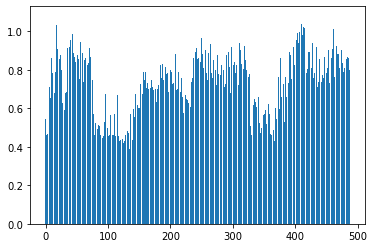

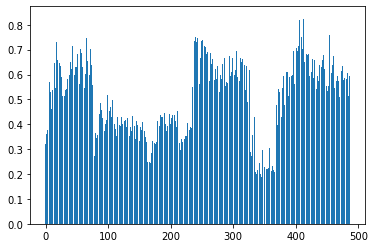

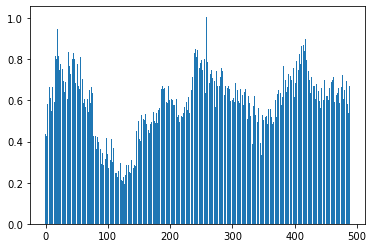

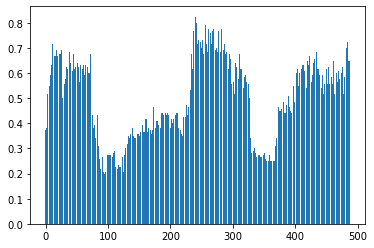

In [31]:
plot_capacity(pearl)
plot_capacity(brock)
plot_capacity(breck)
plot_capacity(yerkes)

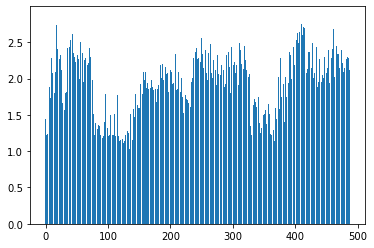

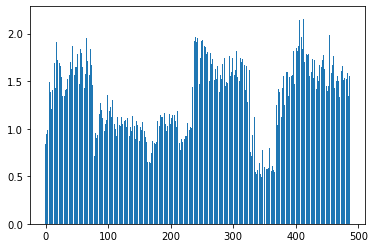

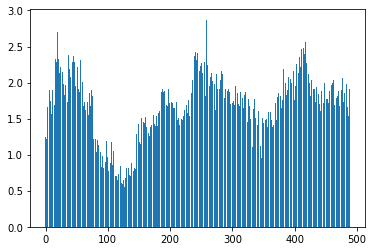

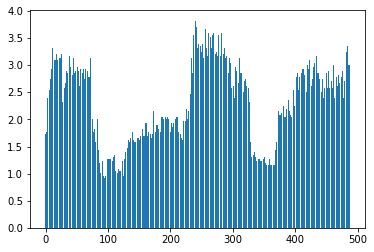

In [32]:
plot_sq_ft(pearl)
plot_sq_ft(brock)
plot_sq_ft(breck)
plot_sq_ft(yerkes)